In [46]:
name='user'

In [47]:
import pandas as pd
import plotly as py
from plotly.offline import download_plotlyjs,init_notebook_mode, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from numpy import var
from math import sqrt
from math import log
from math import exp
import os
import glob
init_notebook_mode(connected=True)

import matplotlib.pyplot as plt #used for visualization purposes in this tutorial.
import numpy as np

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, MaxPool1D, Flatten,Conv2D, MaxPool2D
from keras.utils import np_utils
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#from adafruit_servokit import ServoKit
#kit=ServoKit(Channels=16)

csvs_rest = glob.glob(f"./Datasets/{name}/rest/*.csv")
csvs_index = glob.glob(f"./Datasets/{name}/index/*.csv")
csvs_closed = glob.glob(f"./Datasets/{name}/closed/*.csv")
csvs_middle_finger = glob.glob(f"./Datasets/{name}/middle-finger/*.csv")
#csvs_cylindrical = glob.glob(f"./Datasets/{name}/cylindrical/*.csv")
csvs_pinch = glob.glob(f"./Datasets/{name}/pinch/*.csv")

df_rest = pd.DataFrame()
df_index = pd.DataFrame()
df_closed = pd.DataFrame()
df_middle_finger = pd.DataFrame()
#df_cylindrical_bottle = pd.DataFrame()
df_pinch = pd.DataFrame()
for c in csvs_rest:
    if df_rest.empty:
        df_rest = pd.read_csv(c)
    else:
        df_rest = pd.concat([df_rest,pd.read_csv(c)]).reset_index(drop=True)
        
for c in csvs_index:
    if df_index.empty:
        df_index = pd.read_csv(c)
    else:
        df_index = pd.concat([df_index,pd.read_csv(c)]).reset_index(drop=True)
        
for c in csvs_closed:
    if df_closed.empty:
        df_closed = pd.read_csv(c)
    else:
        df_closed = pd.concat([df_closed,pd.read_csv(c)]).reset_index(drop=True)
        
for c in csvs_middle_finger:
    if df_middle_finger.empty:
        df_middle_finger = pd.read_csv(c)
    else:
        df_middle_finger = pd.concat([df_middle_finger,pd.read_csv(c)]).reset_index(drop=True)
        
#for c in csvs_cylindrical:
 #   if df_cylindrical_bottle.empty:
  #      df_cylindrical_bottle = pd.read_csv(c)
   # else:
    #    df_cylindrical_bottle = pd.concat([df_cylindrical_bottle,pd.read_csv(c)]).reset_index(drop=True)

for c in csvs_pinch:
    if df_pinch.empty:
        df_pinch = pd.read_csv(c)
    else:
        df_pinch = pd.concat([df_pinch,pd.read_csv(c)]).reset_index(drop=True)


index_emg1=df_index.iloc[0:,1]
index_emg3=df_index.iloc[0:,3]
index_emg8=df_index.iloc[0:,8]

middle_emg1=df_middle_finger.iloc[0:,1]
middle_emg3=df_middle_finger.iloc[0:,3]
middle_emg8=df_middle_finger.iloc[0:,8]

closed_emg1=df_closed.iloc[0:,1]
closed_emg3=df_closed.iloc[0:,3]
closed_emg8=df_closed.iloc[0:,8]

#cylindrical_emg1=df_cylindrical_bottle.iloc[0:,1]
#cylindrical_emg3=df_cylindrical_bottle.iloc[0:,3]
#cylindrical_emg8=df_cylindrical_bottle.iloc[0:,8]

rest_emg1=df_rest.iloc[0:,1]
rest_emg3=df_rest.iloc[0:,3]
rest_emg8=df_rest.iloc[0:,8]

pinch_emg1=df_pinch.iloc[0:,1]
pinch_emg3=df_pinch.iloc[0:,3]
pinch_emg8=df_pinch.iloc[0:,8]


index=[]
middle=[]
closed=[]
#cylinder=[]
rest=[]
pinch=[]

index.append([index_emg1])
index.append([index_emg3])
index.append([index_emg8])

middle.append([middle_emg1])
middle.append([middle_emg3])
middle.append([middle_emg8])

closed.append([closed_emg1])
closed.append([closed_emg3])
closed.append([closed_emg8])

#cylinder.append([cylindrical_emg1])
#cylinder.append([cylindrical_emg3])
#cylinder.append([cylindrical_emg8])

pinch.append([pinch_emg1])
pinch.append([pinch_emg3])
pinch.append([pinch_emg8])

rest.append([rest_emg1])
rest.append([rest_emg3])
rest.append([rest_emg8])

gestures=[]
gestures.append(index)
gestures.append(middle)
gestures.append(closed)
#gestures.append(cylinder)
gestures.append(pinch)
gestures.append(rest)

ModuleNotFoundError: No module named 'adafruit_servokit'

In [3]:
sr = 200 #samplerate in Hz
eventLength =8

events=[["0",1],['1',11],['2',21],['3',31],['4',41],['5',51],
          ['6',63],['7',73],['8',83],['9',93],['10',102],['11',111],
          ['12',124],['13',134],['14',144],['15',154],['16',164],['17',174],
          ['18',184],['19',194],['20',204],['21',214],['22',225],['23',235],
          ['24',245],['25',255],['26',265],['27',275],['28',285],['29',295],
          ['30',307],['31',317],['32',327],['33',336],['34',346],['35',356],
          ['36',368],['37',378],['38',388],['39',398],['40',408],['41',418],
          ['42',428],['43',438],['44',449],['45',459],['46',469],['47',479],
          ['48',489],['49',499],['50',509],['51',519],['52',529],['53',539],
          ['54',550],['55',560],['56',570],['57',580],['58',591],['59',601],
          ['60',611],['61',621],['62',632],['63',642],['64',652],['65',662],
          ['66',673],['67',683],['68',693],['69',703],['70',713],['71',723]
          ]

In [4]:
x0=[]
y0=[]
EMG =gestures[0][0][0]
label=0
windows=[]
for event in events:
    startSample = sr * event[1] #samplerate of the signal multiplied by the onset of the event in s
    endSample = startSample + (sr * eventLength) #Final sample to use for estimation
    window=EMG[startSample:endSample]
    x0.append(window)
    y0.append(label)

x1=[]
y1=[]
EMG =gestures[1][0][0]
label=1
windows=[]
for event in events:
    startSample = sr * event[1] #samplerate of the signal multiplied by the onset of the event in s
    endSample = startSample + (sr * eventLength) #Final sample to use for estimation
    window=EMG[startSample:endSample]
    x1.append(window)
    y1.append(label)

x2=[]
y2=[]
EMG =gestures[2][0][0]
label=2
windows=[]
for event in events:
    startSample = sr * event[1] #samplerate of the signal multiplied by the onset of the event in s
    endSample = startSample + (sr * eventLength) #Final sample to use for estimation
    window=EMG[startSample:endSample]
    x2.append(window)
    y2.append(label)

x3=[]
y3=[]
EMG =gestures[3][0][0]
label=3
windows=[]
for event in events:
    startSample = sr * event[1] #samplerate of the signal multiplied by the onset of the event in s
    endSample = startSample + (sr * eventLength) #Final sample to use for estimation
    window=EMG[startSample:endSample]
    x3.append(window)
    y3.append(label)

x4=[]
y4=[]
EMG =gestures[4][0][0]
label=4
windows=[]
for event in events:
    startSample = sr * event[1] #samplerate of the signal multiplied by the onset of the event in s
    endSample = startSample + (sr * eventLength) #Final sample to use for estimation
    window=EMG[startSample:endSample]
    x4.append(window)
    y4.append(label)


x=[]
y=[]
x.append(x0)
x.append(x1)
x.append(x2)
x.append(x3)
x.append(x4)

y.append(y0)
y.append(y1)
y.append(y2)
y.append(y3)
y.append(y4)

#GET ALL GESTURES AND LABELS IN THIS FORM
X=[]
Y=[]
for window in x[0]:
    X.append(window)
for window in x[1]:
    X.append(window)
for window in x[2]:
    X.append(window)
for window in x[3]:
    X.append(window)
for window in x[4]:
    X.append(window)

for window in y[0]:
    Y.append(window)
for window in y[1]:
    Y.append(window)
for window in y[2]:
    Y.append(window)
for window in y[3]:
    Y.append(window)
for window in y[4]:
    Y.append(window)

In [5]:
n_classes=5
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.10,random_state=42)
#y_train = np_utils.to_categorical(y_train, n_classes)
#y_test = np_utils.to_categorical(y_test, n_classes)

import numpy as np
x_train1=np.asarray(x_train)
x_test1=np.asarray(x_test)
y_train1=np.asarray(y_train)
y_test1=np.asarray(y_test)

#x_train1=x_train1.reshape(162, 1600,1)
#x_test1=x_test1.reshape(162, 1600, 1)

In [6]:
import pandas as pd
df_train=pd.DataFrame(x_train1)
df_test=pd.DataFrame(x_test1)
df_train['label']=y_train
df_test['label']=y_test

In [7]:
# Stack the DataFrames on top of each other
df = pd.concat([df_train, df_test], axis=0)
df.reset_index(drop=True)

,0,1,2,3,4,5,6,7,8,9,...,1591,1592,1593,1594,1595,1596,1597,1598,1599,label
0,0,-1,-1,0,0,-3,-1,0,0,0,...,0,2,-1,0,0,-1,-1,-2,-2,0
1,-1,0,0,0,0,2,-1,-2,0,-1,...,-1,-2,-2,-1,0,-2,-2,0,-1,4
2,1,-1,-1,0,-1,0,-2,0,-1,0,...,-1,-2,-2,2,0,0,-1,-1,-3,1
3,0,-1,-1,-1,0,-2,-2,0,-1,1,...,1,-1,0,-1,-1,0,-2,-2,-1,1
4,0,-1,0,0,-1,-1,-1,-2,-1,-2,...,2,0,-1,-1,1,0,4,1,-2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,-1,-1,-1,0,-1,-1,0,0,0,-1,...,-2,1,-2,-3,-1,-1,-2,1,0,0
356,2,-4,1,-1,1,-3,-1,-2,-5,1,...,-1,1,0,-5,0,0,-3,-3,-2,4
357,-2,1,-2,0,0,-1,-2,-1,-1,-1,...,-1,-1,-2,-2,1,1,-3,0,1,2
358,-3,4,-27,14,-5,9,-35,9,5,1,...,1,-1,-1,-2,0,-1,1,-1,1,1


In [8]:
# Write DataFrame to CSV
df.to_csv('GESTURE_DATAFRAME_2.csv', index=False)

In [9]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=42)
x.shape

(360, 1600)

In [10]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
x = x.reshape((x.shape[0], x.shape[1], n_features))
x.shape

(360, 1600, 1)

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=42)

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense
 
keras.regularizers.l1(0.01)
keras.regularizers.l2(0.01)
keras.regularizers.l1_l2(l1=0.01, l2=0.01)
# define model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=1, activation='relu', input_shape=(x.shape[1], n_features)))
model.add(MaxPool1D(pool_size=2))

#model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
#model.add(MaxPool1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=1, activation='relu',))
model.add(MaxPool1D(pool_size=2))

model.add(Conv1D(filters=32, kernel_size=1, activation='relu'))
model.add(MaxPool1D(pool_size=2))

model.add(Conv1D(filters=16, kernel_size=1, activation='relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Conv1D(filters=8, kernel_size=1, activation='relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(filters=4, kernel_size=1, activation='relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(5,activation='softmax'))
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1600, 32)          64        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 800, 32)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 800, 64)           2112      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 400, 64)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 400, 32)           2080      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 200, 32)          0

C:\Users\Praahas\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [13]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=600,verbose=1)


Epoch 1/600
11/11 [==============================] - 8s 50ms/step - loss: 3.3484 - accuracy: 0.2191 - val_loss: 1.6633 - val_accuracy: 0.1944
Epoch 2/600
11/11 [==============================] - 0s 11ms/step - loss: 1.7628 - accuracy: 0.2623 - val_loss: 1.5613 - val_accuracy: 0.1944
Epoch 3/600
11/11 [==============================] - 0s 10ms/step - loss: 1.6131 - accuracy: 0.2253 - val_loss: 1.5301 - val_accuracy: 0.3056
Epoch 4/600
11/11 [==============================] - 0s 11ms/step - loss: 1.4648 - accuracy: 0.3302 - val_loss: 1.5184 - val_accuracy: 0.3333
Epoch 5/600
11/11 [==============================] - 0s 11ms/step - loss: 1.4056 - accuracy: 0.4444 - val_loss: 1.4977 - val_accuracy: 0.3056
Epoch 6/600
11/11 [==============================] - 0s 11ms/step - loss: 1.3681 - accuracy: 0.4568 - val_loss: 1.4171 - val_accuracy: 0.4722
Epoch 7/600
11/11 [==============================] - 0s 10ms/step - loss: 1.3982 - accuracy: 0.4167 - val_loss: 1.3973 - val_accuracy: 0.4444
Epoch 

11/11 [==============================] - 0s 11ms/step - loss: 0.4170 - accuracy: 0.7932 - val_loss: 0.4612 - val_accuracy: 0.8056
Epoch 59/600
11/11 [==============================] - 0s 11ms/step - loss: 0.3937 - accuracy: 0.8333 - val_loss: 0.4551 - val_accuracy: 0.7778
Epoch 60/600
11/11 [==============================] - 0s 11ms/step - loss: 0.4295 - accuracy: 0.8272 - val_loss: 0.4448 - val_accuracy: 0.8056
Epoch 61/600
11/11 [==============================] - 0s 11ms/step - loss: 0.4325 - accuracy: 0.8148 - val_loss: 0.4312 - val_accuracy: 0.7500
Epoch 62/600
11/11 [==============================] - 0s 11ms/step - loss: 0.4060 - accuracy: 0.8148 - val_loss: 0.4410 - val_accuracy: 0.8056
Epoch 63/600
11/11 [==============================] - 0s 11ms/step - loss: 0.4616 - accuracy: 0.7778 - val_loss: 0.4635 - val_accuracy: 0.7500
Epoch 64/600
11/11 [==============================] - 0s 11ms/step - loss: 0.4153 - accuracy: 0.7932 - val_loss: 0.4354 - val_accuracy: 0.8056
Epoch 65/600

11/11 [==============================] - 0s 11ms/step - loss: 0.3499 - accuracy: 0.8241 - val_loss: 0.3949 - val_accuracy: 0.7778
Epoch 116/600
11/11 [==============================] - 0s 11ms/step - loss: 0.3177 - accuracy: 0.8735 - val_loss: 0.4074 - val_accuracy: 0.7500
Epoch 117/600
11/11 [==============================] - 0s 12ms/step - loss: 0.3214 - accuracy: 0.8457 - val_loss: 0.3955 - val_accuracy: 0.7778
Epoch 118/600
11/11 [==============================] - 0s 11ms/step - loss: 0.3467 - accuracy: 0.8426 - val_loss: 0.3860 - val_accuracy: 0.8056
Epoch 119/600
11/11 [==============================] - 0s 11ms/step - loss: 0.3415 - accuracy: 0.8395 - val_loss: 0.4082 - val_accuracy: 0.7778
Epoch 120/600
11/11 [==============================] - 0s 11ms/step - loss: 0.3804 - accuracy: 0.8148 - val_loss: 0.3897 - val_accuracy: 0.8056
Epoch 121/600
11/11 [==============================] - 0s 11ms/step - loss: 0.3446 - accuracy: 0.8333 - val_loss: 0.3910 - val_accuracy: 0.7778
Epoch 

Epoch 172/600
11/11 [==============================] - 0s 11ms/step - loss: 0.2888 - accuracy: 0.8735 - val_loss: 0.4125 - val_accuracy: 0.7778
Epoch 173/600
11/11 [==============================] - 0s 11ms/step - loss: 0.2641 - accuracy: 0.8951 - val_loss: 0.3852 - val_accuracy: 0.8333
Epoch 174/600
11/11 [==============================] - 0s 10ms/step - loss: 0.2910 - accuracy: 0.8519 - val_loss: 0.4217 - val_accuracy: 0.7500
Epoch 175/600
11/11 [==============================] - 0s 11ms/step - loss: 0.2885 - accuracy: 0.8457 - val_loss: 0.3862 - val_accuracy: 0.8333
Epoch 176/600
11/11 [==============================] - 0s 12ms/step - loss: 0.3198 - accuracy: 0.8086 - val_loss: 0.4049 - val_accuracy: 0.7778
Epoch 177/600
11/11 [==============================] - 0s 11ms/step - loss: 0.3242 - accuracy: 0.8333 - val_loss: 0.3961 - val_accuracy: 0.7500
Epoch 178/600
11/11 [==============================] - 0s 11ms/step - loss: 0.3278 - accuracy: 0.8179 - val_loss: 0.4298 - val_accuracy:

Epoch 229/600
11/11 [==============================] - 0s 13ms/step - loss: 0.2525 - accuracy: 0.8580 - val_loss: 0.4091 - val_accuracy: 0.7500
Epoch 230/600
11/11 [==============================] - 0s 11ms/step - loss: 0.3235 - accuracy: 0.8333 - val_loss: 0.3673 - val_accuracy: 0.8056
Epoch 231/600
11/11 [==============================] - 0s 11ms/step - loss: 0.3327 - accuracy: 0.8333 - val_loss: 0.5114 - val_accuracy: 0.7778
Epoch 232/600
11/11 [==============================] - 0s 11ms/step - loss: 0.3022 - accuracy: 0.8519 - val_loss: 0.3666 - val_accuracy: 0.8333
Epoch 233/600
11/11 [==============================] - 0s 11ms/step - loss: 0.2602 - accuracy: 0.8796 - val_loss: 0.4164 - val_accuracy: 0.7500
Epoch 234/600
11/11 [==============================] - 0s 11ms/step - loss: 0.2452 - accuracy: 0.8796 - val_loss: 0.4078 - val_accuracy: 0.7500
Epoch 235/600
11/11 [==============================] - 0s 11ms/step - loss: 0.2461 - accuracy: 0.8673 - val_loss: 0.4242 - val_accuracy:

Epoch 286/600
11/11 [==============================] - 0s 11ms/step - loss: 0.2115 - accuracy: 0.8889 - val_loss: 0.4127 - val_accuracy: 0.8056
Epoch 287/600
11/11 [==============================] - 0s 11ms/step - loss: 0.2044 - accuracy: 0.9105 - val_loss: 0.4126 - val_accuracy: 0.7500
Epoch 288/600
11/11 [==============================] - 0s 11ms/step - loss: 0.2493 - accuracy: 0.8704 - val_loss: 0.3656 - val_accuracy: 0.8056
Epoch 289/600
11/11 [==============================] - 0s 11ms/step - loss: 0.2853 - accuracy: 0.8519 - val_loss: 0.3610 - val_accuracy: 0.8056
Epoch 290/600
11/11 [==============================] - 0s 11ms/step - loss: 0.2336 - accuracy: 0.8796 - val_loss: 0.3966 - val_accuracy: 0.7500
Epoch 291/600
11/11 [==============================] - 0s 11ms/step - loss: 0.2268 - accuracy: 0.8889 - val_loss: 0.3743 - val_accuracy: 0.8056
Epoch 292/600
11/11 [==============================] - 0s 11ms/step - loss: 0.2189 - accuracy: 0.8981 - val_loss: 0.3638 - val_accuracy:

Epoch 343/600
11/11 [==============================] - 0s 11ms/step - loss: 0.2301 - accuracy: 0.8920 - val_loss: 0.4282 - val_accuracy: 0.7778
Epoch 344/600
11/11 [==============================] - 0s 11ms/step - loss: 0.2161 - accuracy: 0.8889 - val_loss: 0.4337 - val_accuracy: 0.7222
Epoch 345/600
11/11 [==============================] - 0s 11ms/step - loss: 0.2310 - accuracy: 0.8858 - val_loss: 0.3917 - val_accuracy: 0.7500
Epoch 346/600
11/11 [==============================] - 0s 12ms/step - loss: 0.1985 - accuracy: 0.9198 - val_loss: 0.4654 - val_accuracy: 0.7500
Epoch 347/600
11/11 [==============================] - 0s 12ms/step - loss: 0.2056 - accuracy: 0.8981 - val_loss: 0.3741 - val_accuracy: 0.8056
Epoch 348/600
11/11 [==============================] - 0s 11ms/step - loss: 0.2041 - accuracy: 0.9136 - val_loss: 0.4448 - val_accuracy: 0.7500
Epoch 349/600
11/11 [==============================] - 0s 11ms/step - loss: 0.1986 - accuracy: 0.9074 - val_loss: 0.3789 - val_accuracy:

Epoch 400/600
11/11 [==============================] - 0s 11ms/step - loss: 0.2281 - accuracy: 0.9043 - val_loss: 0.4557 - val_accuracy: 0.7222
Epoch 401/600
11/11 [==============================] - 0s 11ms/step - loss: 0.1831 - accuracy: 0.9290 - val_loss: 0.4394 - val_accuracy: 0.7500
Epoch 402/600
11/11 [==============================] - 0s 11ms/step - loss: 0.2352 - accuracy: 0.9105 - val_loss: 0.4161 - val_accuracy: 0.7778
Epoch 403/600
11/11 [==============================] - 0s 11ms/step - loss: 0.1811 - accuracy: 0.9136 - val_loss: 0.4494 - val_accuracy: 0.6944
Epoch 404/600
11/11 [==============================] - 0s 10ms/step - loss: 0.1847 - accuracy: 0.9167 - val_loss: 0.3933 - val_accuracy: 0.7778
Epoch 405/600
11/11 [==============================] - 0s 11ms/step - loss: 0.1939 - accuracy: 0.9228 - val_loss: 0.4128 - val_accuracy: 0.7778
Epoch 406/600
11/11 [==============================] - 0s 12ms/step - loss: 0.1899 - accuracy: 0.9105 - val_loss: 0.4693 - val_accuracy:

Epoch 457/600
11/11 [==============================] - 0s 11ms/step - loss: 0.1742 - accuracy: 0.9198 - val_loss: 0.4447 - val_accuracy: 0.8333
Epoch 458/600
11/11 [==============================] - 0s 11ms/step - loss: 0.1284 - accuracy: 0.9352 - val_loss: 0.4400 - val_accuracy: 0.7778
Epoch 459/600
11/11 [==============================] - 0s 12ms/step - loss: 0.1741 - accuracy: 0.9105 - val_loss: 0.4663 - val_accuracy: 0.7778
Epoch 460/600
11/11 [==============================] - 0s 11ms/step - loss: 0.1617 - accuracy: 0.9321 - val_loss: 0.4281 - val_accuracy: 0.7778
Epoch 461/600
11/11 [==============================] - 0s 11ms/step - loss: 0.1527 - accuracy: 0.9321 - val_loss: 0.4789 - val_accuracy: 0.7778
Epoch 462/600
11/11 [==============================] - 0s 12ms/step - loss: 0.1450 - accuracy: 0.9352 - val_loss: 0.4328 - val_accuracy: 0.7778
Epoch 463/600
11/11 [==============================] - 0s 11ms/step - loss: 0.1593 - accuracy: 0.9259 - val_loss: 0.4291 - val_accuracy:

Epoch 514/600
11/11 [==============================] - 0s 11ms/step - loss: 0.1638 - accuracy: 0.9290 - val_loss: 0.4829 - val_accuracy: 0.7500
Epoch 515/600
11/11 [==============================] - 0s 11ms/step - loss: 0.1152 - accuracy: 0.9475 - val_loss: 0.5190 - val_accuracy: 0.7500
Epoch 516/600
11/11 [==============================] - 0s 11ms/step - loss: 0.1340 - accuracy: 0.9475 - val_loss: 0.5180 - val_accuracy: 0.8056
Epoch 517/600
11/11 [==============================] - 0s 11ms/step - loss: 0.1470 - accuracy: 0.9352 - val_loss: 0.5521 - val_accuracy: 0.7778
Epoch 518/600
11/11 [==============================] - 0s 11ms/step - loss: 0.1160 - accuracy: 0.9475 - val_loss: 0.5636 - val_accuracy: 0.7500
Epoch 519/600
11/11 [==============================] - 0s 12ms/step - loss: 0.1298 - accuracy: 0.9414 - val_loss: 0.5471 - val_accuracy: 0.7500
Epoch 520/600
11/11 [==============================] - 0s 11ms/step - loss: 0.1383 - accuracy: 0.9414 - val_loss: 0.5156 - val_accuracy:

Epoch 571/600
11/11 [==============================] - 0s 11ms/step - loss: 0.1244 - accuracy: 0.9568 - val_loss: 0.4640 - val_accuracy: 0.7778
Epoch 572/600
11/11 [==============================] - 0s 11ms/step - loss: 0.1398 - accuracy: 0.9444 - val_loss: 0.4229 - val_accuracy: 0.7778
Epoch 573/600
11/11 [==============================] - 0s 12ms/step - loss: 0.1360 - accuracy: 0.9290 - val_loss: 0.4876 - val_accuracy: 0.7778
Epoch 574/600
11/11 [==============================] - 0s 11ms/step - loss: 0.1186 - accuracy: 0.9599 - val_loss: 0.4987 - val_accuracy: 0.8056
Epoch 575/600
11/11 [==============================] - 0s 11ms/step - loss: 0.1430 - accuracy: 0.9352 - val_loss: 0.5017 - val_accuracy: 0.7778
Epoch 576/600
11/11 [==============================] - 0s 11ms/step - loss: 0.1287 - accuracy: 0.9321 - val_loss: 0.4895 - val_accuracy: 0.7778
Epoch 577/600
11/11 [==============================] - 0s 12ms/step - loss: 0.1017 - accuracy: 0.9568 - val_loss: 0.5030 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


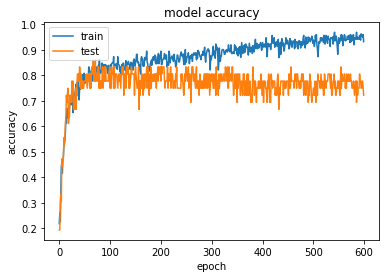

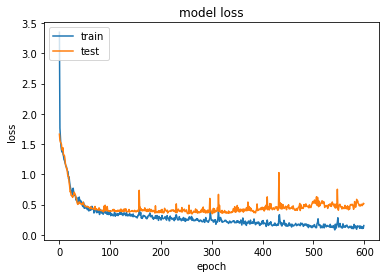

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
model.save('model.keras')

In [16]:
import pysiology

Thank you for using Pysiology. If you use it in your work, please cite:
Gabrieli G., Azhari A., Esposito G. (2020) PySiology: A Python Package for Physiological Feature Extraction. In: Esposito A., Faundez-Zanuy M., Morabito F., Pasero E. (eds) Neural Approaches to Dynamics of Signal Exchanges. Smart Innovation, Systems and Technologies, vol 151. Springer, Singapore


In [17]:
emg_windows=[]
for i in range(len(x_train)):
    x_train_tmp=[]
    c=[]
    for j in range (len(x_train[i])):
        x_train_tmp.append(pd.Series(x_train[i][j]).item())
    c.append(pd.Series(x_train_tmp))
    emg_windows.append(c)

In [18]:
emg_array=[]
for j in range (0,324):
    emg_array_tmp=[]
    for i in range(0,1600):#emg_windows[0][0][1600]
        emg_array_tmp.append(emg_windows[j][0][i])
    emg_array.append(emg_array_tmp)

In [19]:
result=[]
for i in range(len(emg_array)):
    #result_temp=[]
    result.append(pysiology.electromyography.analyzeEMG(emg_array[i],200))

C:\Users\Praahas\AppData\Local\Programs\Python\Python39\lib\site-packages\pysiology\electromyography.py:690: RuntimeWarning:

divide by zero encountered in double_scalars



In [20]:
timeDomainFeatures=[]
for i in range(len(result)):
    timeDomainFeatures.append(result[i]["TimeDomain"])

In [21]:
timeDomainFeatures[0]

{'IEMG': 9645.68572965534,
 'MAV': 6.028553581034588,
 'MAV1': 5.396637471912048,
 'MAV2': 5.459204650619827,
 'SSI': 151598.21208958008,
 'VAR': 94.8081376420138,
 'TM3': 21.54692195498255,
 'TM4': 55182.65744649245,
 'TM5': 17935.980534590817,
 'LOG': 415.1141659341805,
 'RMS': 9.73390376755326,
 'WL': 11795.364276178927,
 'AAC': 7.372102672611829,
 'DASDV': 138.0237504954308,
 'AFB': 0.0042718237902340805,
 'ZC': 692,
 'MYOP': 0.99125,
 'WAMP': 800,
 'SSC': 400,
 'MAVSLPk': [5.95614806941166,
  9.716618286406051,
  2.4239399526202847,
  0.14126725788869238],
 'HIST': {1: {'ZC': 76, 'WAMP': 85},
  2: {'ZC': 81, 'WAMP': 87},
  3: {'ZC': 75, 'WAMP': 91},
  4: {'ZC': 69, 'WAMP': 81},
  5: {'ZC': 76, 'WAMP': 87},
  6: {'ZC': 71, 'WAMP': 92},
  7: {'ZC': 81, 'WAMP': 89},
  8: {'ZC': 79, 'WAMP': 91},
  9: {'ZC': 79, 'WAMP': 88}}}

In [22]:
MAV=[]
MAV1=[]
MAV2=[]
SSI=[]
VAR=[]
TM3=[]
TM4=[]
TM5=[]
LOG=[]
RMS=[]
WL=[]
AAC=[]
DASDV=[]
AFB=[]
ZC=[]
MYOP=[]
WAMP=[]
SSC=[]
for i in range(len(timeDomainFeatures)):
    MAV.append(timeDomainFeatures[i]["MAV"])
    MAV1.append(timeDomainFeatures[i]["MAV1"])
    MAV2.append(timeDomainFeatures[i]["MAV2"])
    SSI.append(timeDomainFeatures[i]["SSI"])
    VAR.append(timeDomainFeatures[i]["VAR"])
    TM3.append(timeDomainFeatures[i]["TM3"])
    TM4.append(timeDomainFeatures[i]["TM4"])
    TM5.append(timeDomainFeatures[i]["TM5"])
    LOG.append(timeDomainFeatures[i]["LOG"])
    RMS.append(timeDomainFeatures[i]["RMS"])
    WL.append(timeDomainFeatures[i]["WL"])
    AAC.append(timeDomainFeatures[i]["AAC"])
    DASDV.append(timeDomainFeatures[i]["DASDV"])
    AFB.append(timeDomainFeatures[i]["AFB"]) 
    ZC.append(timeDomainFeatures[i]["ZC"])
    MYOP.append(timeDomainFeatures[i]["MYOP"])
    WAMP.append(timeDomainFeatures[i]["WAMP"])
    SSC.append(timeDomainFeatures[i]["SSC"])

TDF=[]
for i in range (324):
    tmp=[]
    tmp.append(MAV[i])
    tmp.append(MAV1[i])
    tmp.append(MAV2[i])
    tmp.append(SSI[i])
    tmp.append(VAR[i])
    tmp.append(TM3[i])
    tmp.append(TM4[i])
    tmp.append(TM5[i])
    tmp.append(LOG[i])
    tmp.append(RMS[i])
    tmp.append(WL[i])
    tmp.append(AAC[i])
    tmp.append(AFB[i])
    tmp.append(MYOP[i])
    tmp.append(WAMP[i])
    tmp.append(SSC[i])
    TDF.append(tmp)

In [23]:
emg_train_df=pd.DataFrame(np.array(TDF),columns=['MAV','MAV1','MAV2','SSI','VAR','TM3','TM4','TM5','LOG','RMS','WL','AAC','AFB','MYOP','WAMP','SSC'])
emg_train_df['label']=y_train

In [24]:
emg_train_df

,MAV,MAV1,MAV2,SSI,VAR,TM3,TM4,TM5,LOG,RMS,WL,AAC,AFB,MYOP,WAMP,SSC,label
0,6.028554,5.396637,5.459205,151598.212090,94.808138,21.546922,55182.657446,1.793598e+04,415.114166,9.733904,11795.364276,7.372103,0.004272,0.991250,800.0,400.0,1
1,0.445955,0.334276,0.220175,503.528588,0.314902,0.033620,0.298232,1.141219e-01,1.561982,0.560986,804.475959,0.502797,0.064823,0.988125,786.0,338.0,4
2,8.227068,6.932964,7.130886,295751.717103,184.960423,381.660100,248257.186842,2.410998e+06,3740.849845,13.595765,15796.333014,9.872708,0.199162,0.990625,809.0,378.0,1
3,0.500328,0.372946,0.245549,618.078692,0.386541,0.022242,0.423909,5.283207e-02,1.649263,0.621530,965.817473,0.603636,0.057677,0.986250,782.0,361.0,4
4,8.263915,7.492572,7.681053,276144.372415,172.698169,176.426267,146375.826130,3.782570e+05,3881.258550,13.137360,16819.742652,10.512339,0.073259,0.991875,799.0,371.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,1.918155,1.486753,0.938698,19490.269426,12.189037,46.261887,5006.243557,3.959451e+04,6.808383,3.490189,3663.324505,2.289578,0.098869,0.993750,826.0,360.0,3
320,5.243188,4.323372,4.061072,121316.723796,75.870371,148.458033,51939.184095,6.344994e+05,189.272521,8.707638,10058.276142,6.286423,0.077266,0.993750,801.0,372.0,2
321,7.825696,6.816315,5.894675,237129.416033,148.298572,315.836515,122365.419662,6.374017e+05,2504.128978,12.173984,14773.764424,9.233603,-0.046064,0.995625,767.0,381.0,1
322,0.819504,0.610763,0.311605,2331.121102,1.457862,0.257762,19.377401,4.073800e+00,2.269375,1.207042,1570.862707,0.981789,-0.011578,0.991875,800.0,377.0,4


In [25]:
emg_windows=[]
for i in range(len(x_test)):
    x_test_tmp=[]
    c=[]
    for j in range (len(x_test[i])):
        x_test_tmp.append(pd.Series(x_test[i][j]).item())
    c.append(pd.Series(x_test_tmp))
    emg_windows.append(c)

In [26]:
emg_array=[]
for j in range (0,36):
    emg_array_tmp=[]
    for i in range(0,1600):#emg_windows[0][0][1600]
        emg_array_tmp.append(emg_windows[j][0][i])
    emg_array.append(emg_array_tmp)

In [27]:
result=[]
for i in range(len(emg_array)):
    #result_temp=[]
    result.append(pysiology.electromyography.analyzeEMG(emg_array[i],200))

C:\Users\Praahas\AppData\Local\Programs\Python\Python39\lib\site-packages\pysiology\electromyography.py:690: RuntimeWarning:

divide by zero encountered in double_scalars



In [28]:
timeDomainFeatures=[]
for i in range(len(result)):
    timeDomainFeatures.append(result[i]["TimeDomain"])

In [29]:
MAV=[]
MAV1=[]
MAV2=[]
SSI=[]
VAR=[]
TM3=[]
TM4=[]
TM5=[]
LOG=[]
RMS=[]
WL=[]
AAC=[]
DASDV=[]
AFB=[]
ZC=[]
MYOP=[]
WAMP=[]
SSC=[]
for i in range(len(timeDomainFeatures)):
    MAV.append(timeDomainFeatures[i]["MAV"])
    MAV1.append(timeDomainFeatures[i]["MAV1"])
    MAV2.append(timeDomainFeatures[i]["MAV2"])
    SSI.append(timeDomainFeatures[i]["SSI"])
    VAR.append(timeDomainFeatures[i]["VAR"])
    TM3.append(timeDomainFeatures[i]["TM3"])
    TM4.append(timeDomainFeatures[i]["TM4"])
    TM5.append(timeDomainFeatures[i]["TM5"])
    LOG.append(timeDomainFeatures[i]["LOG"])
    RMS.append(timeDomainFeatures[i]["RMS"])
    WL.append(timeDomainFeatures[i]["WL"])
    AAC.append(timeDomainFeatures[i]["AAC"])
    DASDV.append(timeDomainFeatures[i]["DASDV"])
    AFB.append(timeDomainFeatures[i]["AFB"]) 
    ZC.append(timeDomainFeatures[i]["ZC"])
    MYOP.append(timeDomainFeatures[i]["MYOP"])
    WAMP.append(timeDomainFeatures[i]["WAMP"])
    SSC.append(timeDomainFeatures[i]["SSC"])
    
TDF=[]
for i in range (36):
    tmp=[]
    tmp.append(MAV[i])
    tmp.append(MAV1[i])
    tmp.append(MAV2[i])
    tmp.append(SSI[i])
    tmp.append(VAR[i])
    tmp.append(TM3[i])
    tmp.append(TM4[i])
    tmp.append(TM5[i])
    tmp.append(LOG[i])
    tmp.append(RMS[i])
    tmp.append(WL[i])
    tmp.append(AAC[i])
    tmp.append(AFB[i])
    tmp.append(MYOP[i])
    tmp.append(WAMP[i])
    tmp.append(SSC[i])
    TDF.append(tmp)

In [30]:
emg_test_df=pd.DataFrame(np.array(TDF),columns=['MAV','MAV1','MAV2','SSI','VAR','TM3','TM4','TM5','LOG','RMS','WL','AAC','AFB','MYOP','WAMP','SSC'])
emg_test_df['label']=y_test

In [31]:
emg_test_df

,MAV,MAV1,MAV2,SSI,VAR,TM3,TM4,TM5,LOG,RMS,WL,AAC,AFB,MYOP,WAMP,SSC,label
0,4.978625,3.974449,2.893142,114027.713033,71.311891,58.642978,69504.719588,2.923444e+05,145.274445,8.441997,9660.621178,6.037888,-0.031167,0.992500,791.0,357.0,2
1,8.265882,7.128799,4.512133,272666.114361,170.522898,680.749669,166013.812074,2.127481e+06,3888.903345,13.054360,16210.412993,10.131508,0.005289,0.995000,819.0,351.0,0
2,0.433739,0.324455,0.220703,477.294491,0.298496,0.006563,0.280304,1.825565e-02,1.543016,0.546177,768.089783,0.480056,0.016663,0.985625,791.0,333.0,4
3,6.038520,4.851217,3.384443,121242.869941,75.824184,71.554331,38782.670347,5.806863e+03,419.272178,8.704987,11457.774993,7.161109,-0.026828,0.998750,814.0,363.0,2
4,1.819590,1.459019,0.810232,17634.982553,11.028757,35.313764,3895.205926,5.868945e+04,6.169327,3.319919,3441.876162,2.151173,-0.069872,0.994375,785.0,373.0,3
5,6.850457,6.479890,6.459640,207144.551265,129.546311,263.123023,114055.031908,1.198187e+06,944.312048,11.378284,13200.370371,8.250231,-0.109561,0.993750,796.0,369.0,0
6,2.409426,2.001304,1.815818,20846.036196,13.036921,5.750434,966.810578,1.562784e+03,11.127568,3.609539,4595.582294,2.872239,0.222998,0.992500,802.0,355.0,3
7,9.005559,7.755312,7.879936,336485.702341,210.435086,426.844472,267849.644180,8.287844e+05,8148.250458,14.501847,17271.325788,10.794579,0.160483,0.995625,793.0,345.0,1
8,0.482309,0.358968,0.236370,579.926793,0.362681,0.006216,0.380368,1.831842e-02,1.619809,0.602042,922.323961,0.576452,-0.039900,0.987500,782.0,367.0,4
9,0.535321,0.396384,0.267385,1019.705600,0.637715,0.000042,27.291173,3.450724e+00,1.707996,0.798321,1040.400386,0.650250,0.019947,0.991250,788.0,370.0,4


In [32]:
emg_train_df.to_csv('emg_train.csv')
emg_test_df.to_csv('emg_test.csv')

In [33]:
emg_train_df.append(emg_test_df).reset_index(drop=True, inplace=True)
emg_df=emg_train_df.append(emg_test_df)

In [34]:
emg_df.to_csv(f"emg_{name}.csv", sep=',', index=False)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from numpy import var
from math import sqrt
from math import log
from math import exp
import os
import glob
import matplotlib.pyplot as plt #used for visualization purposes in this tutorial.
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, MaxPool1D, Flatten,Conv2D, MaxPool2D
import np_utils
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [37]:
model = tf.keras.models.load_model('model.keras')
model.summary()
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1600, 32)          64        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 800, 32)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 800, 64)           2112      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 400, 64)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 400, 32)           2080      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 200, 32)          0

In [ ]:
def numbers_to_control(argument):
    switcher = {
        0: "Point",
        1: "Middle",
        2: "Grip",
        3: "Pinch",
        4: "No Gesture"
    }
 
    # get() method of dictionary data type returns
    # value of passed argument if it is present
    # in dictionary otherwise second argument will
    # be assigned as default value of passed argument
    return switcher.get(argument, "nothing")

In [54]:
sample_number=5
df = pd.read_csv('GESTURE_DATAFRAME_2.csv')
test_sample=df.iloc[sample_number,:-1].to_numpy()
test_sample_label=df.iloc[sample_number,-1]
test_sample = (np.expand_dims(test_sample,0))
predictions_single = probability_model.predict(test_sample)
#print("Actual Gesture:",test_sample_label )
#print("Predicted Gesture:",np.argmax(predictions_single[0]))

if np.argmax(predictions_single[0])==0:
    print("point")
    angle=[180,0,180,180,180]
elif np.argmax(predictions_single[0])==1:
     print("middle")
        angle=[180,180,0,180,180]
elif np.argmax(predictions_single[0])==2:
    print("grip")
    angle=[180,180,180,180,180]
elif np.argmax(predictions_single[0])==3:
    print("pinch")
    angle=[180,180,180,0,0]
else:
    print("rest")
    angle=[0,0,0,0,0]
#kit.servo[0].angle=angle[0]
#kit.servo[1].angle=angle[1]
#kit.servo[2].angle=angle[2]
#kit.servo[3].angle=angle[3]
#kit.servo[4].angle=angle[4]

point


In [ ]:



    #motor_value=input()
    #kit.servo[0].angle=int(motor_value)